In [73]:
%matplotlib inline

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import linalg

from sklearn.decomposition import PCA



# Principal Component Analysis
### What is PCA?

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. It works by transforming the original features into a new set of uncorrelated features called *principal components*, which capture most of the variability in the data.

![](PCA.webp)

PCA is centered on identifying the primary directions of **maximum variance** within the data. These high-variance directions typically signify the signal, while low-variance directions tend to reflect noise. By retaining the most significant principal components, PCA can filter out noise and highlight the underlying patterns in the data. 

PCA falls in the unsupervised branch of machine learning which uses **orthogonal linear transformation** based on the eigenvector and eigenvalue decomposition of the covariance matrix [[1](https://www.datacamp.com/tutorial/principal-component-analysis-in-python)][[2](https://medium.com/@niranjan.appaji/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d#:~:text=The%20curse%20of%20dimensionality%20refers,as%20we%20add%20more%20dimensions.)][[3](https://medium.com/codex/principle-component-analysis-pca-simplified-with-implementation-a05eb86084f8)].


PCA will be more useful when the variables are strongly correlated because the combined variable will then contain more information of the variables, compared to if the variables show a weak correlation to each other [[4](https://www.youtube.com/watch?v=dz8imS1vwIM)]

#### Why is PCA useful?

PCA is useful for reducing the dimensionality of the data while retaining as much information as possible. Reducing dimensionality can lead to simpler models, reduced computational complexity, and improved generalization to new, unseen data. In addition, utilizing a model trained on a reduced set of principal components typically demands fewer computational resources and less time, leading to enhanced overall model performace.


**The curse of dimensionality** refers to the increasing amount of data required to effectively fill space as the number of dimensions grows. For exmple, eight points may fill a one-dimensional space well, but their distance from each other becomes more noticeable as we add more dimensions. In a 10 or more dimensional space, these points would be even more widely dispersed.





![](dimensionsionality.jpg)


Selecting inputs, which involves reducing the number of inputs, is an evident strategy to counteract the curse of dimensionality. However, diminishing the dimensionality is also a straightforward method to overlook crucial inform The main rationale for excluding a variable is its redundancy, specifically, the presence of multicollinearity among variables. [[2](https://medium.com/@niranjan.appaji/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d#:~:text=The%20curse%20of%20dimensionality%20refers,as%20we%20add%20more%20dimensions.)]

### Eigenvalue Decomposition PCA Demo

We can summarize the **basic steps** of PCA as follows:1. Standardization of data
2. Computation of Covariance Matrix
3. Calculation of Eigenvectsor and Eigenvalsue
4. Selection of number of Principal Components
5. Multiplication of principal components with original data to create the newly transformed data set.

Let's demonstrate the techniqueon a simple synthetic dataset that presents a correlation between *salary* and *expenses*. We will generate the dataset as a *NumPy array* and then create a *DataFrame* using *Pandas*:

In [74]:
# Creating a dummy dataset
data = np.array([[1000, 500],[2000, 800],[3000, 1100],[4000, 1500],[5000,1800],[8000, 1900]])
# Creating a dataframe
df = pd.DataFrame(data,columns = ['Salary','Expenses'])

In [75]:
df

,Salary,Expenses
0,1000,500
1,2000,800
2,3000,1100
3,4000,1500
4,5000,1800
5,8000,1900


Let's visualize the dataset by a scatterplot using a regression line to show the **correlation** using *Seaborn*:

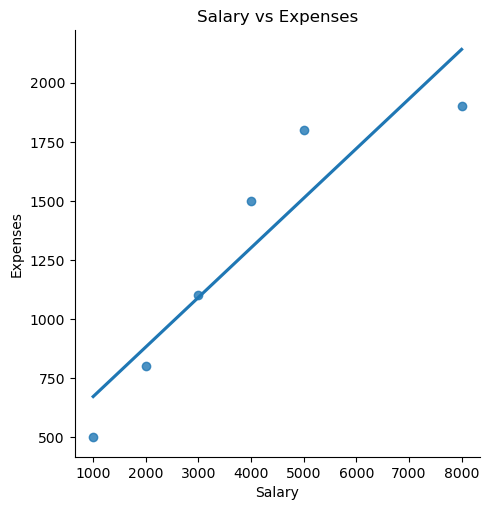

In [76]:
# Create a scatter plot with a regression line to show the correlation
plot = sns.lmplot(x = 'Salary', y = 'Expenses', data = df, ci = None)
plt.title("Salary vs Expenses")
plt.xlabel('Salary')
plt.ylabel('Expenses')
plt.show()

Now we can proceed with the first step:

### 1. Standardization of data

As PCA will calculate a new projection of our dataset in which the new axes are based on the standard deviation of our variables, a variable with a high standard deviation will have a higher weight for the calculation of the axes than a variable with a low standard deviation. This is the reason why we need to standardize the data.

To standardize a variable, we subtract the corresponding mean from all values of the variable, which will result in centered data. Then we divide the centered data by the standard deviation of the corresponding variable, which will give us the standardized variable: 

$$ z = \frac{x - \mu}{\sigma}$$

By standardizing the variables, we have transformed them to have a mean ($\mu$) of 0 and a standard deviation ($\sigma$) of 1. 

To implementis in the code, we use will *pandas*, as it is closer to implementation the math, while standardization is usully done using *StandardScaler*, *RobustScaler*, or *MinMaxScaler* of the sklearn library.

In [95]:
# Calculate the mean of each column
mean_salary = df['Salary'].mean()
mean_expense = df['Expenses'].mean()

# Calculate the standard deviation of each column
std_salary = df['Salary'].std()
std_expense = df['Expenses'].std()

# Standardize the columns and rename them
df['Salary Standardized'] = (df['Salary'] - mean_salary) / std_salary
df['Expenses Standardized'] = (df['Expenses'] - mean_expense) / std_expense

standardized_data = df[['Salary Standardized', 'Expenses Standardized']].to_numpy()

In [97]:
df

,Salary,Expenses,Salary Standardized,Expenses Standardized
0,1000,500,-1.140965,-1.366725
1,2000,800,-0.738272,-0.831920
2,3000,1100,-0.335578,-0.297114
3,4000,1500,0.067116,0.415960
4,5000,1800,0.469809,0.950765
5,8000,1900,1.677890,1.129034


Let's visualise the standartized data which is centered around the center now:

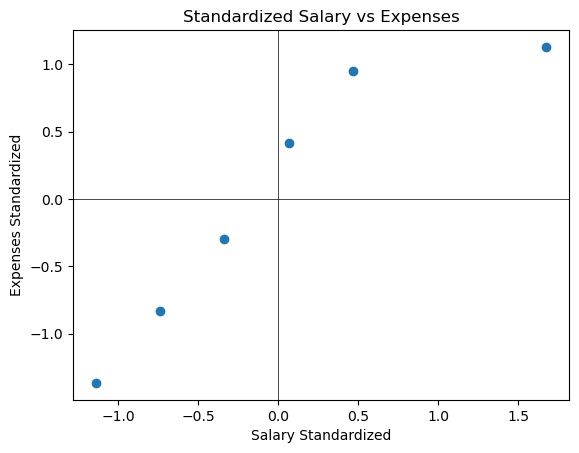

In [79]:
# Create a scatter plot of the standardized data
plt.scatter(df['Salary Standardized'], df['Expenses Standardized'])

# Plot the main axes
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.title("Standardized Salary vs Expenses")
plt.xlabel('Salary Standardized')
plt.ylabel('Expenses Standardized')
plt.show()


### 2. Computation of Covariance Matrix

The **Covariance Matrix** is a square matrix  that displays the variance exhibited by elements of datasets and the covariance between a pair of datasets. It is also known as the **variance-covariance matrix** because the variance of each element is represented along the matrix’s major diagonal and the covariance is represented among the non-diagonal elements. **Variance** is a measure of dispersion and can be defined as the spread of data from the mean of the given dataset. **Covariance** is calculated between two variables and is used to measure how the two variables vary together[[5](https://www.cuemath.com/algebra/covariance-matrix/)][[6](https://www.geeksforgeeks.org/covariance-matrix/)].

For two variables $x$ and $y$, the covariance matrix $\sum$ is:

$$ \sum = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix} $$

Here are the formulas for variance and covariance:

$$ \text{Var}(x) = \sum_{i=1}^n \frac{(x_i -\bar{x)^2}{n - 1} $$

$$ \text{Cov}(x, y) = \sum_{i=1}^n \frac{(x_i - \bar{x})(y_i - \bar{y})}{n - 1}$$ 

We will use *NumPy* to make those calculations:

In [113]:
# Compute the covariance matrix
cov_matrix = np.cov(standardized_data[:,0], standardized_data[:,1])
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[1.         0.92845287]
 [0.92845287 1.        ]]


In [108]:
standardized_data

array([[-1.14096529, -1.36672523],
       [-0.73827166, -0.8319197 ],
       [-0.33557803, -0.29711418],
       [ 0.06711561,  0.41595985],
       [ 0.46980924,  0.95076538],
       [ 1.67789014,  1.12903389]])

|                       | Salary Standardized | Expenses Standardized |
|-----------------------|:-------------------:|:---------------------:|
| Salary Standardized   |          1          |       0.92845287      |
| Expenses Standardized |      0.92845287     |           1           |\end{table}

Even though the variances on the diagonal are all 1 (due to standardization), the off-diagonal elements of the covariance matrix still represent the covariance between the pair of variables.

### 3. Calculation of Eigenvectors and Eigenvalues

The **eigenvectors** of a linear transformation are those vectors that remain pointed in the **same directions** and occupy the **same span** after the transformation. For these vectors, the effect of the transform matrix is just scalar multiplication. For each eigenvector, the **eigenvalue** is the **scalar** that the eigenvector is scaled by under the transformation. The eigenvalues therefore represent the spread of the data in the direction of the eigenvectors. 

Dimensionality reduction by means of PCA is accomplished by projecting the data onto the largest eigenvectors of its covariance matrix. The **principal components88 are obtained by the **eigendecomposition of the covariance matrix** of our data. The dimensionality is then reduced by projecting the data onto the largest eigenvectors.

If we have a 2 x 2 matrix $A$, we are going to have 2 eigenvalues ($\lambda_1, \lambda_2$), obtained by solving the equation given in the expression below:

$$|A - \lambda I| = 0 $$

Where $I$ is the identity matrix, with a size corresponding to $A$.

The corresponding eigenvectors ($e_1, e_2$) for each eigenvalue are obtained by the following expression[[6](https://towardsdatascience.com/eigen-intuitions-understanding-eigenvectors-and-eigenvalues-630e9ef1f719)][[7](https://online.stat.psu.edu/stat505/lesson/4/4.5)][[8](https://www.visiondummy.com/2014/05/feature-extraction-using-pca/)]:

$$(A - \lambda I)e = 0 $$


Let's compute the eigenvalues and eigenvectors for our demo using *NumPy*:

In [118]:
# Calculate eigenvalues and eigenvectors
cov_matrix = np.array([[1.0, 0.92845287],
[0.92845287, 1.0]])
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[1.92845287 0.07154713]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Now let's have the same plot with our data this time with both eigenvectors.

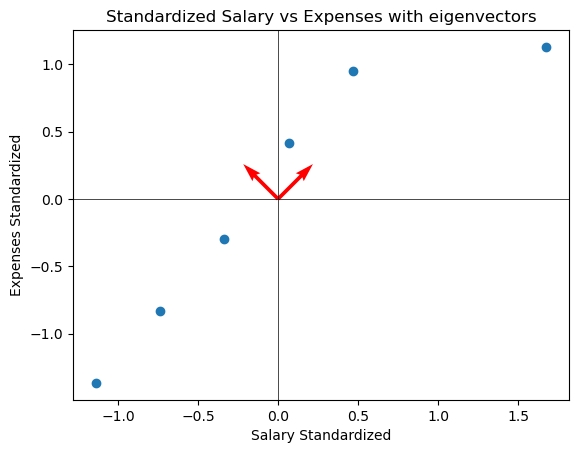

In [120]:
# Create a scatter plot of the standardized data
plt.scatter(df['Salary Standardized'], df['Expenses Standardized'])

# Plot the main axes
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.quiver(0.70710678, 0.70710678, color=['r'], scale=3, scale_units='xy')
plt.quiver(-0.70710678, 0.70710678, color=['r'], scale=3, scale_units='xy')
plt.title("Standardized Salary vs Expenses with eigenvectors")
plt.xlabel('Salary Standardized')
plt.ylabel('Expenses Standardized')
plt.show()


### 4. Selection of number of Principal Components

The different columns of the eigenvector matrix depict different eigenvectors. We will choose an eigenvector corresponding to the highest eigenvalue and that will be our **first principal component**. PCA  assumes that the most interesting feature is the one with the largest variance or spread. This assumption is based on an information theoretic point of view, since the dimension with the largest variance corresponds to the dimension with the largest entropy and thus encodes the most information. The smallest eigenvectors will often simply represent noise components, whereas the largest eigenvectors often correspond to the principal components that define the data.
https://www.visiondummy.com/2014/05/feature-extraction-using-pca/



The eigenvectors can be used as weights for the linear combination. The weights for the first principal component correspond to the first eigenvector.



In [124]:
var_exp_1 = print('Total variance explained by first principal component is',round(eigenvalues[0]/eigenvalues.sum(),2))
var_exp_2 = print('Total variance explained by second principal component is',round(eigenvalues[1]/eigenvalues.sum(),2))

Total variance explained by first principal component is 0.96
Total variance explained by second principal component is 0.04




Now with the help of the above feature vector, we will project the data from the original axes into principal component axes. We will multiply the feature vector with original standardized data and obtain new transformed features.

In [126]:
#multiply the original data with the eigen vector
final_data = np.dot(standardized_data, np.array(eigenvectors[1]))
print(final_data)

[-1.77320497 -1.11029296 -0.44738095  0.34158593  1.00449794  1.98479501]


In [123]:
pca = PCA(n_components = 1)
pca.fit(standardized_data)
print("Varaince explained by principal component is n", pca.explained_variance_ratio_)
print(pca.transform(standardized_data))

Varaince explained by principal component is n [0.96422644]
[[-1.77320497]
 [-1.11029296]
 [-0.44738095]
 [ 0.34158593]
 [ 1.00449794]
 [ 1.98479501]]


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()

# Create a DataFrame from the iris data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the class column to the DataFrame
df['class'] = iris.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

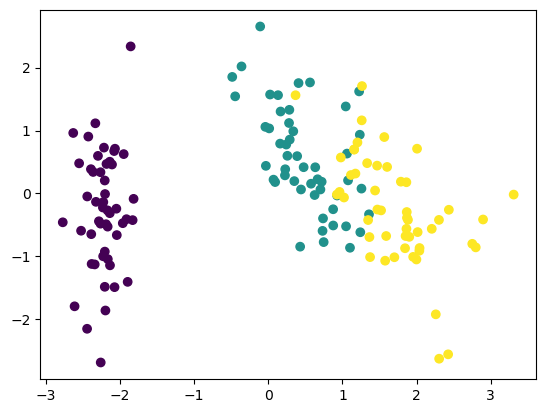

In [12]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

std = StandardScaler()
transformed = StandardScaler().fit_transform(x)
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)